### Import Libraries
 
 

In [1]:
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# # Set plotting style
# sns.set_theme(style="whitegrid")

# import own modules
from Utilities import PathUtility as path
from src.data_handler import DataHandler
from src.model import Model
from src.trainer import Trainer
from src.evaluator import Evaluator
from src.visualizer import Visualizer


### Import Data

In [2]:
# Crete require objects
# Initialize path utility and load data
MyPath = path.PathFinder()
csv_file = os.path.join(MyPath.data_path(), "salary.csv") # Path to the CSV file

# Load data using DataHandler
data = DataHandler(csv_file) # this is now an object of DataHandler class
dataset = data.load_data()  # Load the dataset
print(dataset.head())

# Initialize visualizer
viz = Visualizer()


   Experience Years  Salary
0               1.1   39343
1               1.2   42774
2               1.3   46205
3               1.5   37731
4               2.0   43525


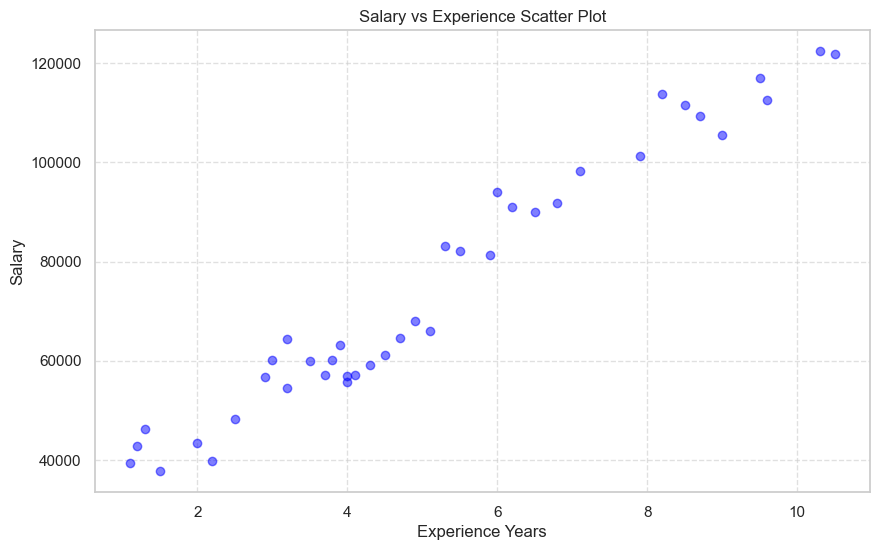

In [3]:
x_label, y_label = data.get_labels()
viz.plot_scatter(dataset, x_label, y_label, title="Salary vs Experience Scatter Plot", color="blue")

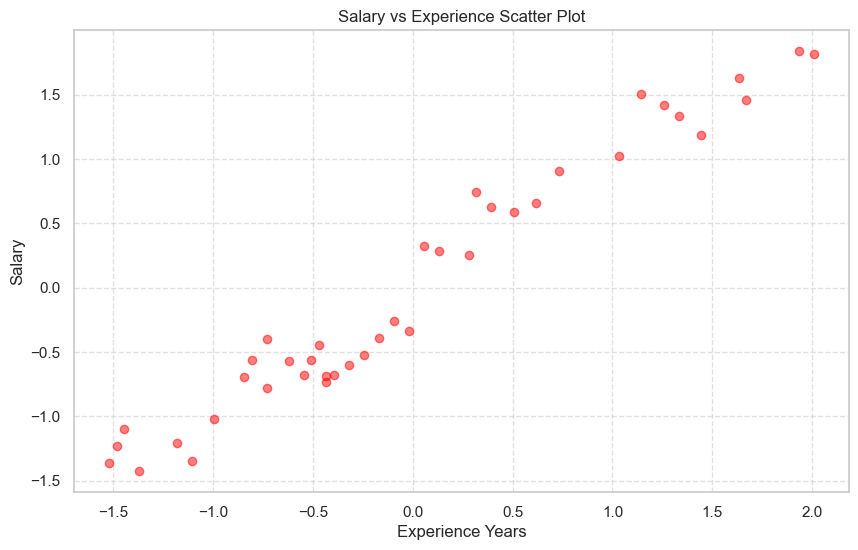

In [4]:
data_normalized = data.z_score_standardize()
viz.plot_scatter(data_normalized, x_label, y_label, title="Salary vs Experience Scatter Plot", color="red")


In [5]:
train_normalized_set, test_normalized_set = data.split_data(df=data_normalized)
print(f"Train set size: {len(train_normalized_set)}, Test set size: {len(test_normalized_set)}")
train_normalized_set.shape, test_normalized_set.shape

print(train_normalized_set.head())
print(test_normalized_set.head())


Train set size: 28, Test set size: 12
    Experience Years    Salary
19         -0.244959 -0.525400
16         -0.432666 -0.685495
15         -0.432666 -0.730317
26          0.318165  0.739827
4          -1.183497 -1.203163
    Experience Years    Salary
3          -1.371205 -1.426464
35          1.444411  1.188508
23          0.055374  0.321592
32          1.144079  1.505692
10         -0.732999 -0.396908


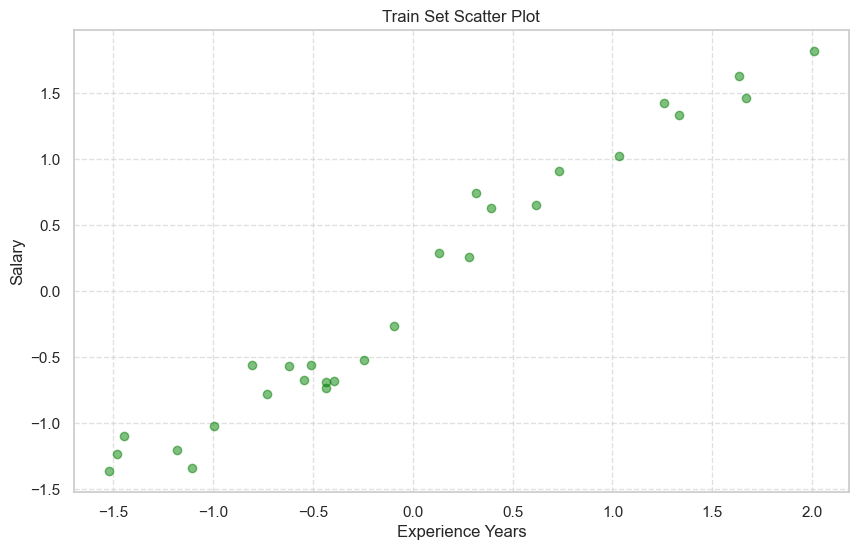

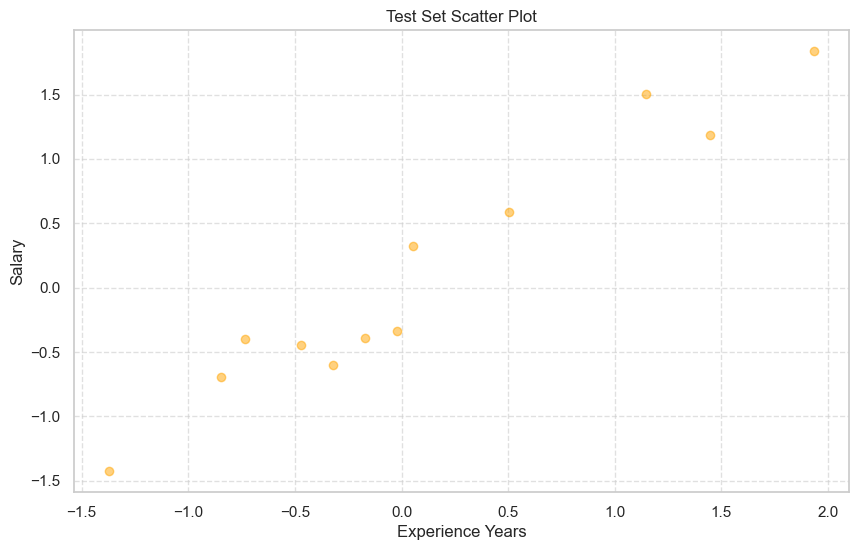

In [6]:
viz.plot_scatter(train_normalized_set, x_label, y_label, title="Train Set Scatter Plot", color="green")
viz.plot_scatter(test_normalized_set, x_label, y_label, title="Test Set Scatter Plot", color="orange")

    Experience Years  Prediction Salary
19         -0.244959          -1.224793
16         -0.432666          -2.163332
15         -0.432666          -2.163332
26          0.318165           1.590823
4          -1.183497          -5.917487


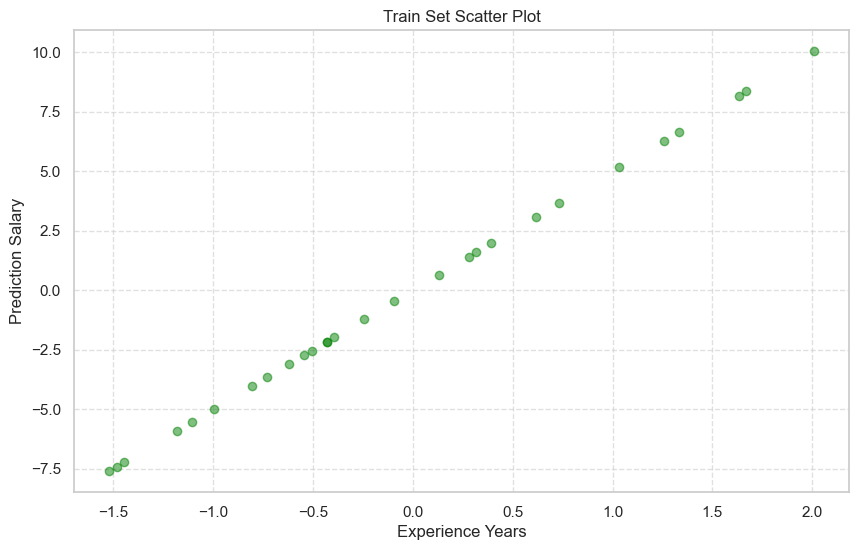

In [20]:
model = Model(theta0=0.0, theta1=5.0) 

# print(train_normalized_set[x_label].head())

y_hat = model.linear_estimator(train_normalized_set, x_label=x_label, y_label="Prediction Salary")
print(y_hat.head())


viz.plot_scatter(y_hat, x_label=x_label, y_label="Prediction Salary", title="Train Set Scatter Plot", color="green")



### 